In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import json
import openrouteservice as ors
import folium

client = ors.Client(key='5b3ce3597851110001cf624851f153e3d6be48549743ab6b36d22033')

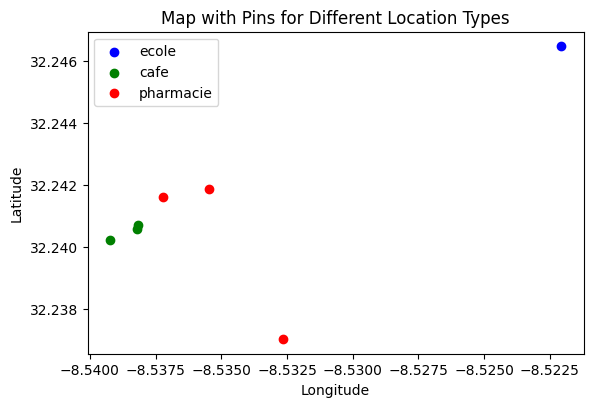

In [4]:
# Load the GeoJSON data using geopandas
geojson_file = "maps/map.json"
gdf = gpd.read_file(geojson_file)

# Define colors for each location type
location_colors = {
    "ecole": "blue",
    "cafe": "green",
    "pharmacie": "red",
}

# Function to plot the map with different colors for each location type
def plot_map_with_pins(gdf):
    # Create a new plot
    fig, ax = plt.subplots()

    # Plot each location type with a different color
    for location_type, color in location_colors.items():
        gdf_type = gdf[gdf["type"] == location_type]
        gdf_type.plot(ax=ax, color=color, marker="o", label=location_type)

    # Set labels and title
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Map with Pins for Different Location Types")
    
    # Show the legend
    ax.legend()

    # Show the plot
    plt.show()

# Call the function to plot the map
plot_map_with_pins(gdf)


In [5]:
def get_the_center_of_the_map(locations):
    sum_lat = 0
    sum_lon = 0
    for location in locations:
        sum_lat += location[0]
        sum_lon += location[1]
    # return 5 numbers after the decimal point
    return round(sum_lat / len(locations), 5), round(sum_lon / len(locations), 5)

In [132]:
# Function to draw the route between two points
def draw_route(start_coord, end_coord):
    route = client.directions(
        coordinates=[start_coord, end_coord],
        profile='foot-walking',
        format='geojson',
        options={"avoid_features": ["steps"]},
        validate=False,
    )
    return folium.PolyLine(locations=[list(reversed(coord)) for coord in route['features'][0]['geometry']['coordinates']], color='blue', weight=3.5, opacity=1)

In [137]:
# Read data from the JSON file
with open('maps/map.json') as f:
    data = json.load(f)

# locations
locations = []
for feature in data['features']:
    locations.append(feature['geometry']['coordinates'][::-1])

# # Create the map
city_coordinates = get_the_center_of_the_map(locations)
city_map = folium.Map(location=city_coordinates, zoom_start=15)

# Define icon colors for different types
icon_colors = {
    "ecole": "blue",
    "cafe": "green",
    "pharmacie": "red",
    "terran": "orange",
}

# Icons list
icons = {
    "ecole": "book",
    "cafe": "music", 
    "pharmacie": "home",
    "terran": "star",
}

# Add markers for each feature in the JSON data
for feature in data['features']:
    properties = feature['properties']
    name = properties.get('name', 'Unknown')
    description = properties.get('description', 'No description')
    location = feature['geometry']['coordinates'][::-1]
    marker_type = properties.get('type')
    
    # Create a custom icon for each type
    icon_color = icon_colors.get(marker_type, "gray")
    icon_icon = icons.get(marker_type, "info-sign")
    icon = folium.Icon(color=icon_color, icon= icon_icon)

    # Create a popup with marker information
    popup = f"<b>{name}</b><br>{description}"

    # Add the marker to the map
    folium.Marker(location=location, popup=popup, icon=icon).add_to(city_map)

# show the map
city_map

In [139]:
# Read data from the JSON file
with open('maps/map.json') as f:
    data = json.load(f)

# locations
locations = []
for feature in data['features']:
    locations.append(feature['geometry']['coordinates'][::-1])

# # Create the map
city_coordinates = get_the_center_of_the_map(locations)
city_map = folium.Map(location=city_coordinates, zoom_start=15)

# Define icon colors for different types
icon_colors = {
    "ecole": "blue",
    "cafe": "green",
    "pharmacie": "red",
    "terran": "orange",
}

# Icons list
icons = {
    "ecole": "book",
    "cafe": "music", 
    "pharmacie": "home",
    "terran": "star",
}

custom_function = """
function myCustomFunction(name) {
    console.log("Custom function called with name:", name);
}
"""

# Add markers for each feature in the JSON data
for feature in data['features']:
    properties = feature['properties']
    name = properties.get('name', 'Unknown')
    description = properties.get('description', 'No description')
    location = feature['geometry']['coordinates'][::-1]
    marker_type = properties.get('type')
    
    # Create a custom icon for each type
    icon_color = icon_colors.get(marker_type, "gray")
    icon_icon = icons.get(marker_type, "info-sign")
    icon = folium.Icon(color=icon_color, icon= icon_icon)
    # Add the custom JavaScript function to the map
    folium.Html(custom_function, script=True).add_to(city_map)

    location1 = locations[1][::-1]
    location2 = locations[2][::-1]

    
    popup = f"""
        <b>{name}</b><br>{description}<br style="line-height:1.5;">
    """
    # Add the marker to the map
    folium.Marker(location=location, popup=popup, icon=icon).add_to(city_map)

# add routes between locations
for i in range(len(locations)-1):
    for j in range(i+1, len(locations)):
        draw_route(locations[i][::-1], locations[j][::-1]).add_to(city_map)

# show the map
city_map